In [80]:
import numpy as np
import numpy as np
import pandas as pd
import json
from keras.utils import to_categorical
from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.decomposition import PCA
def min_max_norm(x):
    num_features = len(x[0, :])
    for i in range(0, num_features):
        min_x = min(x[:, i])
        max_x = max(x[:, i])
        x[:, i] = (x[:, i] - min_x) / (max_x - min_x)
    return x


data = np.load('data_shuffled.npy', allow_pickle=True)



In [81]:
petID = pd.read_csv('train.csv', sep=',', usecols=['PetID']).values
zeros = np.zeros((len(data), 2), dtype=float)
data_temp = np.concatenate((data[:, 0:len(data[0])-1], zeros), 1)
fileNotFound = 0
fileMissingIndex = []
magnitude = 0
score = 0

In [82]:
for i in range(0, len(data)):
	try:
		fileName = 'train_sentiment/' + petID[i][0] + '.json'
		with open(fileName) as json_file:
		    info = json.load(json_file)
		    data_temp[i, -2] = info['documentSentiment']['magnitude']
		    data_temp[i, -1] = info['documentSentiment']['score']
		    magnitude+=info['documentSentiment']['magnitude']
		    score+=info['documentSentiment']['score']
	except:
		fileMissingIndex.append(i)
		fileNotFound += 1

		# uncomment to see which files are missing
		#print("Could not find {}.json".format(petID[i][0]))
		

In [83]:
averageMagnitude = magnitude / (len(data) - fileNotFound)
averageScore = score / (len(data) - fileNotFound)

data_temp[fileMissingIndex, -2] = averageMagnitude
data_temp[fileMissingIndex, -1] = averageScore

data = np.concatenate((data_temp, np.array(data[:, -1], ndmin=2).T), 1)
#data = np.random.shuffle(data)
print("Could not find {} files".format(fileNotFound))

Could not find 551 files


In [84]:
n = len(data[0])-1

In [85]:
data[:, 0:n] = min_max_norm(data[:, 0:n])

In [89]:
data[:,0:n][0]

array([1.0, 0.0196078431372549, 0.8631921824104235, 0.0, 0.0, 0.0,
       0.2857142857142857, 0.0, 0.3333333333333333, 0.5, 0.5, 0.5, 0.5,
       0.0, 0.0, 0.0, 0.02197802197802198, 0.0, 0.1, 0.0375,
       0.6666666666666666, 0.075, 0.6666666666666666], dtype=object)

In [90]:
x_embeddedAlt = TSNE(verbose=1,perplexity=45,n_iter=5000).fit_transform(data[:,0:n])

[t-SNE] Computing 136 nearest neighbors...
[t-SNE] Indexed 14993 samples in 0.182s...
[t-SNE] Computed neighbors for 14993 samples in 7.042s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14993
[t-SNE] Computed conditional probabilities for sample 2000 / 14993
[t-SNE] Computed conditional probabilities for sample 3000 / 14993
[t-SNE] Computed conditional probabilities for sample 4000 / 14993
[t-SNE] Computed conditional probabilities for sample 5000 / 14993
[t-SNE] Computed conditional probabilities for sample 6000 / 14993
[t-SNE] Computed conditional probabilities for sample 7000 / 14993
[t-SNE] Computed conditional probabilities for sample 8000 / 14993
[t-SNE] Computed conditional probabilities for sample 9000 / 14993
[t-SNE] Computed conditional probabilities for sample 10000 / 14993
[t-SNE] Computed conditional probabilities for sample 11000 / 14993
[t-SNE] Computed conditional probabilities for sample 12000 / 14993
[t-SNE] Computed conditional probabilities for sa

In [ ]:
 x_embedded[0]

In [63]:
x_embedded[1]

array([-80.395515,   9.526424], dtype=float32)

In [64]:
x_embedded.shape

(14993, 2)

In [65]:
data[:,n:n+1]

array([[3],
       [4],
       [2],
       ...,
       [4],
       [4],
       [4]], dtype=object)

In [66]:
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(data[:,n])

In [67]:
vis_x = x_embedded[:,0]
vis_y = x_embedded[:,1]
df_subset = pd.DataFrame()
df_subset['tsne-2d-one'] = vis_x
df_subset['tsne-2d-two'] = vis_y
df_subset['y'] = encoded


In [93]:
vis_xAlt = x_embeddedAlt[:,0]
vis_yAlt = x_embeddedAlt[:,1]
df_subsetAlt = pd.DataFrame()
df_subsetAlt['tsne-2d-one'] = vis_xAlt
df_subsetAlt['tsne-2d-two'] = vis_yAlt
df_subsetAlt['y'] = encoded


In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
n

23

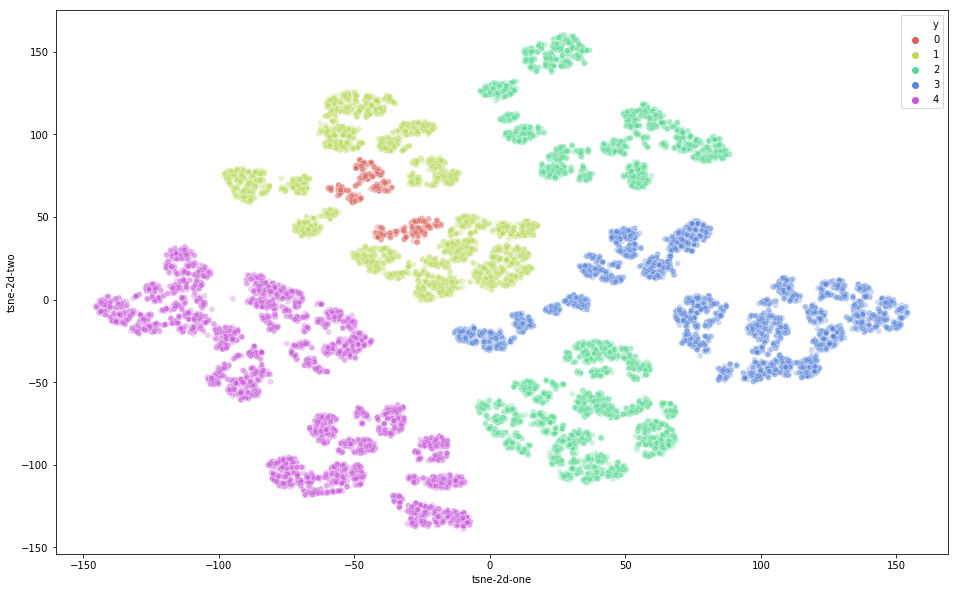

In [70]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 5),
    data=df_subset,
    legend="full",
    alpha=0.3
)

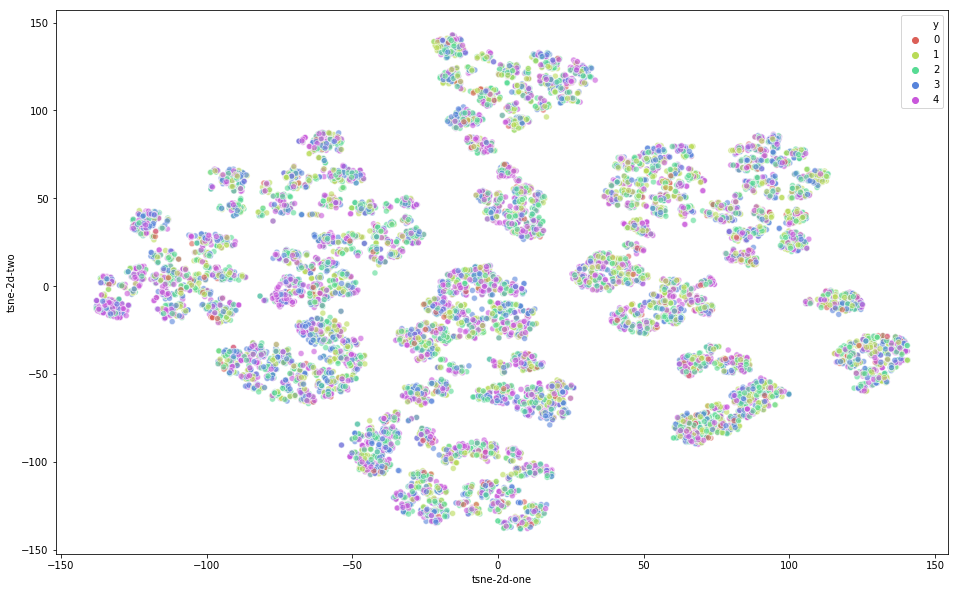

In [94]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 5),
    data=df_subsetAlt,
    legend="full",
    alpha=0.6
)

In [96]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data[:, 0:n])
df = pd.DataFrame()
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
df['y'] = encoded
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.18466341 0.13713201 0.11862737]


In [95]:
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(data[:,n])

In [98]:
from sklearn.linear_model import LogisticRegression

training score : 0.286 (multinomial)
training score : 0.286 (ovr)


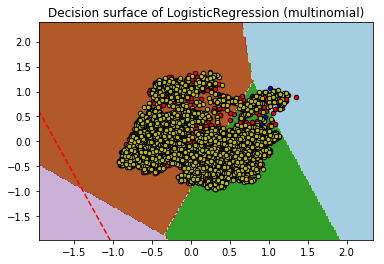

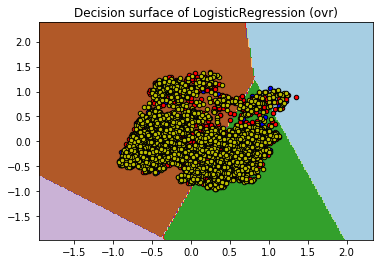

In [99]:
testTs = df.to_numpy()
X = testTs[:,0:2]
y = encoded

for multi_class in ('multinomial', 'ovr'):
    clf = LogisticRegression(solver='newton-cg', max_iter=600, penalty='l2',
                             multi_class=multi_class).fit(X, y)

    # print the training scores
    print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))

    # create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis('tight')

    # Plot also the training points
    colors = "bry"
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,
                    edgecolor='black', s=20)

    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
        
        plt.plot([xmin, xmax], [line(xmin), line(xmax)],
                 ls="--", color=color)

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

plt.show()

In [103]:
testTs[0,0:2]

array([0.24743703, 0.03170256])

In [107]:
clf.predict_proba(testTs[:,0:2])

array([[0.02980658, 0.21854755, 0.27118418, 0.20601793, 0.27444375],
       [0.0178934 , 0.16294765, 0.26438601, 0.25610044, 0.29867251],
       [0.0344066 , 0.23450118, 0.27273585, 0.19444491, 0.26391146],
       ...,
       [0.02829909, 0.2099963 , 0.27226917, 0.21584381, 0.27359163],
       [0.01884454, 0.16797831, 0.26542127, 0.25135933, 0.29639654],
       [0.03234048, 0.22714882, 0.27237858, 0.2001727 , 0.26795942]])